In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from fractions import Fraction
import time
import sys

dyn_pendulum = {"g":9.81, "m": 1.0, "l": 1.0}
x0 = np.array([np.pi-0.1, 0.0])
v1 = np.array([1.0, 0.0])
v2 = np.array([0.0, 1.0])
x_dot = []
x_norm = []
# cum = np.array([0,0,0])

# def cosin 

def simple_pendulum (x0, dyn):
    g = dyn['g'] 
    l = dyn['l']
    #print (x0)
    return np.array([x0[1], (-g/l)*np.sin(x0[0])])


def RungeKutta (dyn, f, dt, x0):
    k1 = f(x0, dyn) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn)
    k3 = f(x0 + 0.5*k2*dt, dyn)
    k4 = f(x0 + k3*dt, dyn)
    
    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) *dt
    return x

def f_t (dyn, f, dt, x0, T):
    x = np.empty(shape=(len(x0),T))
    #print(x.shape)
    x[:, 0] = x0
    # print ('x:', x)
    # print ('x[:, 0]:', x[:, 0])
    # print ('x0:', x0)
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1])
    return x


In [44]:
def sample_based_truncated_le_no_replacement (x, evolv, dt, scalmx, scalmn):
    IND = 0
    SUM = 0.0
    ITS = 0
    IND2 = 0

    DI = np.inf #any large number

    NPT = len(x.T)
    DIM = len(x)
    DT = dt
    SCALMX = scalmx
    SCALMN = scalmn
#     EVOLV = 5 #time from t0 to t1
#     EVOLV_physical = EVOLV/DT
    
    EVOLV = int(evolv) #time from t0 to t1
    EVOLV_physical = EVOLV*DT
    #find nearest neighbor to the first data point
    Z = x.T
    
    for i in range(1, int(NPT)-(EVOLV)):
        D = 0.0
        #iterate through the array, compare first point with the rest
        D = np.linalg.norm(Z[IND] - Z[i])
        if ((D<DI) and (D>=SCALMN)):
#             print (D)
            DI = D
            IND2 = i
#     print('DI:', DI)
    SUM_list = []
    while ((IND + EVOLV < NPT) and (IND2 + EVOLV < NPT)): #40
        PT1 = Z[IND+EVOLV]
        PT2 = Z[IND2+EVOLV]
        DF = np.linalg.norm(PT1 - PT2)
        ITS = ITS + 1
        SUM_list.append(SUM)
#         print ("DI in loop:", DI, EVOLV_physical)
        SUM = SUM + np.log(DF/DI) / EVOLV_physical
        ZLYAP = SUM/ITS
        IND = IND + EVOLV
        if (IND > NPT):
            print('here')
            break
#         print ("IND, IND2, NPT", IND, IND2, NPT)
        
    return ZLYAP

In [46]:
T = 1500
X = np.array(np.meshgrid(np.arange(0 , 2*np.pi, 0.2),
                      np.arange(-8 , 8, 0.2)))

X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1],2)
# new_test_sin = np.array([np.sin(X_reshaped.T[0]),X_reshaped.T[1]])
cum_list = []
for i in X_reshaped:
    x = f_t(dyn_pendulum, simple_pendulum, 0.001, i, T)
    cum_list.append(sample_based_truncated_le_no_replacement (x,3,0.001,10,1e-17))
    
zs = np.array(cum_list)

Text(0.5, 1.0, 'le of simple pendulum, at T=1500, +- [0,2pi] angle from the lowest point and +- 8 angular velocity')

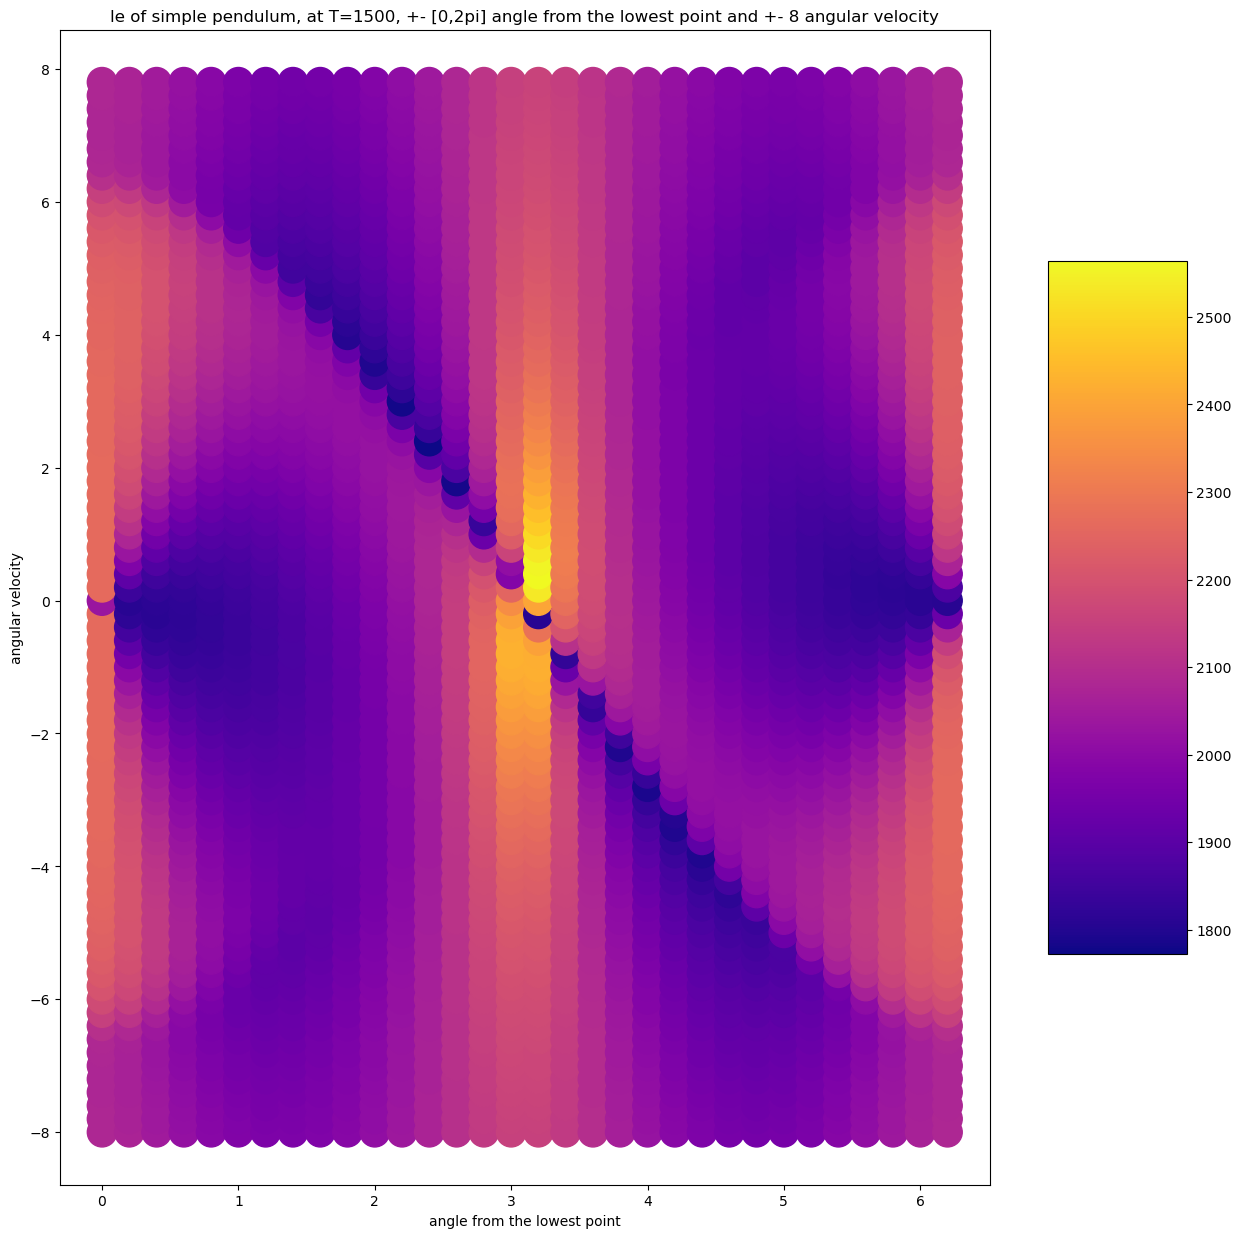

In [47]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plot1 = ax.scatter(X_reshaped.T[0], X_reshaped.T[1], 
                   c=zs, cmap=plt.cm.plasma,vmin=zs.min(), vmax=zs.max(), s=450)
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
ax.set_xlabel('angle from the lowest point')
ax.set_ylabel('angular velocity')
plt.title ('le of simple pendulum, at T={}, +- [0,2pi] angle from the lowest point and +- 8 angular velocity'.format(T))